In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
import BeadDataFile
from discharge_tools import *
sys.path.append('../../../nadavp/new_trap/Tools/StatFramework/')
from likelihood_calculator import likelihood_analyser
lc = likelihood_analyser.LikelihoodAnalyser()

### First trail

In [522]:
foldername = r'/home/data_transfer/data_from_windows/20190903/Bead1/Spin/'
bdfs = load_dir(dirname=foldername, file_prefix='test');

No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantileve

In [523]:
xx_fft = [np.abs(np.fft.rfft(B.spin_data)) for B in bdfs[-5::]]
xx_freq = np.fft.rfftfreq(50000, d=1/5000.)

<IPython.core.display.Javascript object>


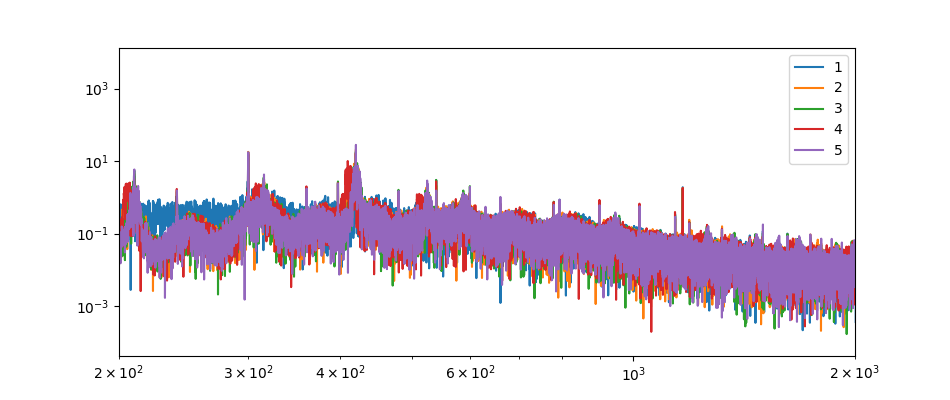

In [524]:
_,ax = plt.subplots(figsize=(9.5,4))
[ax.loglog(xx_freq, xx_fft_, label=i+1) for i,xx_fft_ in enumerate(xx_fft)]
ax.set(xlim=(200,2000))
ax.legend()

<IPython.core.display.Javascript object>


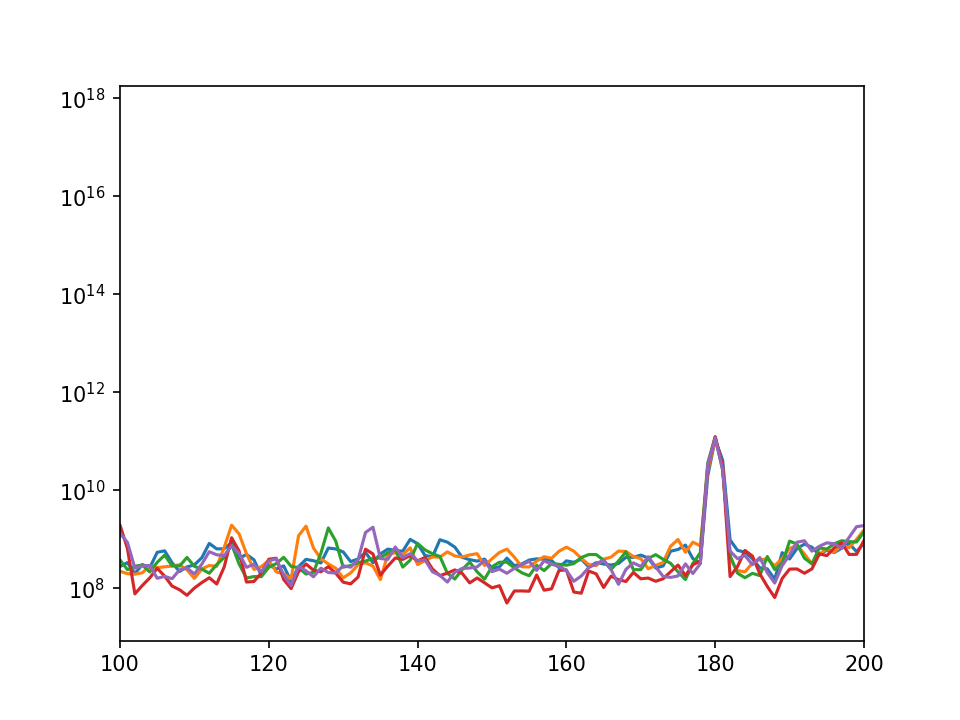

[(100, 200)]

In [237]:
_,ax = plt.subplots()
[ax.semilogy(*B.welch_psd('z',res=5000)) for B in bdfs[-5::]]
ax.set(xlim=(100,200))

In [164]:
bdf_discharge_spin = load_dir(dirname=foldername)
foldername_nospin = r'/home/data_transfer/data_from_windows/20190903/Bead1/Discharge2/'
bdf_discharge_nospin_2 = load_dir(dirname=foldername_nospin)

10  files in folder
10  files loaded
104  files in folder
104  files loaded


In [193]:
bdf_discharge_nospin = bdf_discharge_nospin_2[-10:]

In [521]:
BB = bdf_discharge_nospin[0]
BB.spin_data

array([-0.08723272])

In [194]:
freq = 151
scale = np.mean(bdf_discharge_nospin[0].z2)/1e4
z_nospin = [bdf_.z2/scale for bdf_ in bdf_discharge_nospin]
z_spin = [bdf_.z2/scale for bdf_ in bdf_discharge_spin]

In [212]:
freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': 2.5, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}
m_nospin = [lc.find_mle_sin(x_, drive_freq=freq-2, bandwidth=50, plot=False, **fit_kwargs) for x_ in z_nospin]
m_spin = [lc.find_mle_sin(x_, drive_freq=freq-2, bandwidth=50, plot=False, **fit_kwargs) for x_ in z_spin]

Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.025   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |   2.09    |   0.18    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  2.697541582935592
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.016   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |   0.41    |   0.28    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  2.9964652017664473
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------

<IPython.core.display.Javascript object>


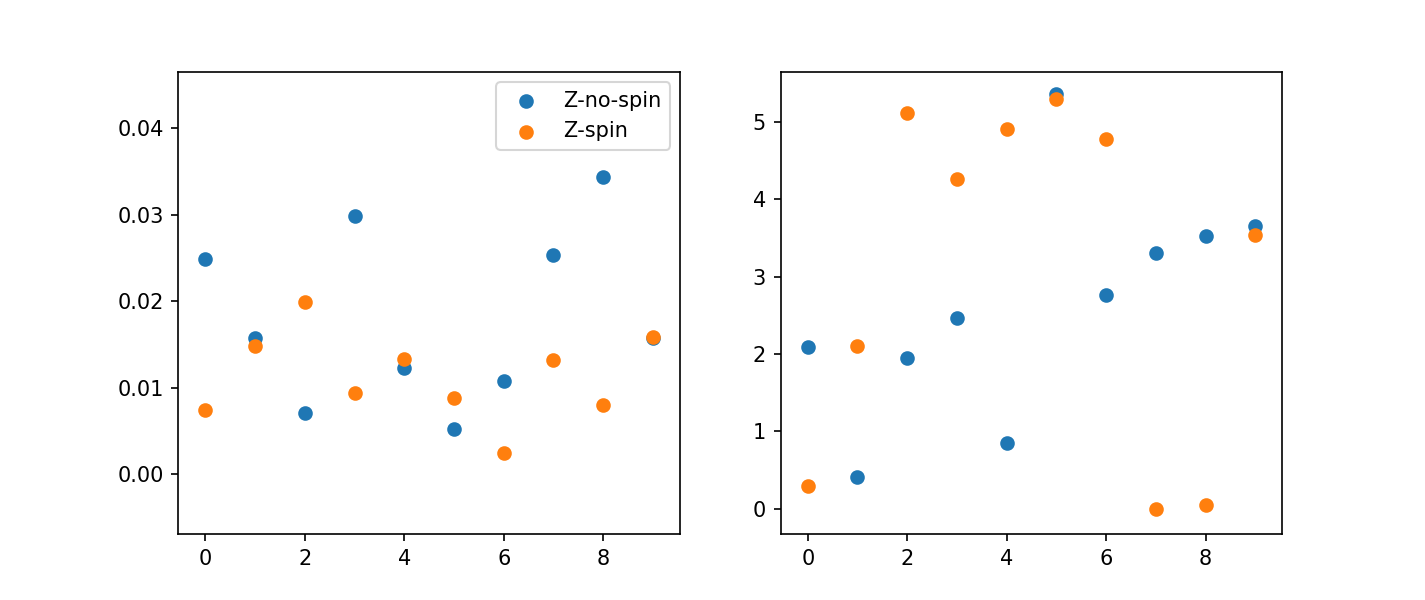

In [213]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
m_nospin_val = np.array([m_.np_values()[0] for m_ in m_nospin])
m_nospin_phi = np.array([m_.np_values()[2] for m_ in m_nospin])
ax[0].scatter(range(len(m_nospin_val)),m_nospin_val, label='Z-no-spin')
ax[1].scatter(range(len(m_nospin_phi)),m_nospin_phi, label='Z-no-spin')

m_spin_val = np.array([m_.np_values()[0] for m_ in m_spin])
m_spin_phi = np.array([m_.np_values()[2] for m_ in m_spin])
ax[0].scatter(range(len(m_spin_val)),m_spin_val, label='Z-spin')
ax[1].scatter(range(len(m_spin_phi)),m_spin_phi, label='Z-spin')

ax[0].legend()

In [530]:
foldername = r'/home/data_transfer/data_from_windows/20190906/Bead1/test/'
bdfs_spindown = load_dir(dirname=foldername);

2  files in folder
2  files loaded


In [531]:
B = bdfs_spindown[-1]
B.spin_data

array([-0.17258025, -0.17242246, -0.17191669, ..., -0.1712684 ,
       -0.17159498, -0.17200614])

In [532]:
B.spin_data.shape, xx_freq.shape, B.x2.shape

((50000,), (25001,), (50000,))

In [508]:
xx_fft = [np.abs(np.fft.rfft(B.spin_data)) for B in bdfs_spindown[-2::]]
xx_freq = np.fft.rfftfreq(50000, d=1/5000.)

In [515]:
bdfs_spindown[-1::][0].spin_data

array([-0.10601546])

<IPython.core.display.Javascript object>


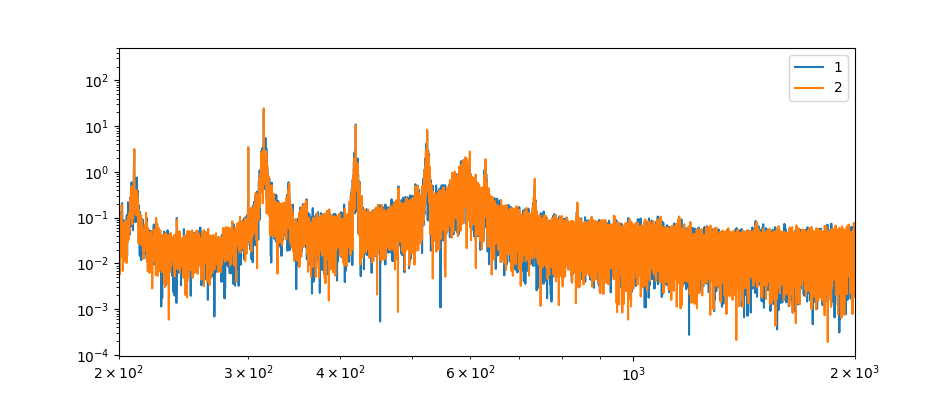

In [506]:
_,ax = plt.subplots(figsize=(9.5,4))
[ax.loglog(xx_freq, xx_fft_, label=i+1) for i,xx_fft_ in enumerate(xx_fft)]
ax.set(xlim=(200,2000))
ax.legend()

### Data 20190917

In [39]:
foldername = r'/home/data_transfer/data_from_windows/20190917/Bead1/Spin1/'
bdfs = load_dir(dirname=foldername, file_prefix='Spin')

No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
15  files in folder
15  files loaded


<IPython.core.display.Javascript object>


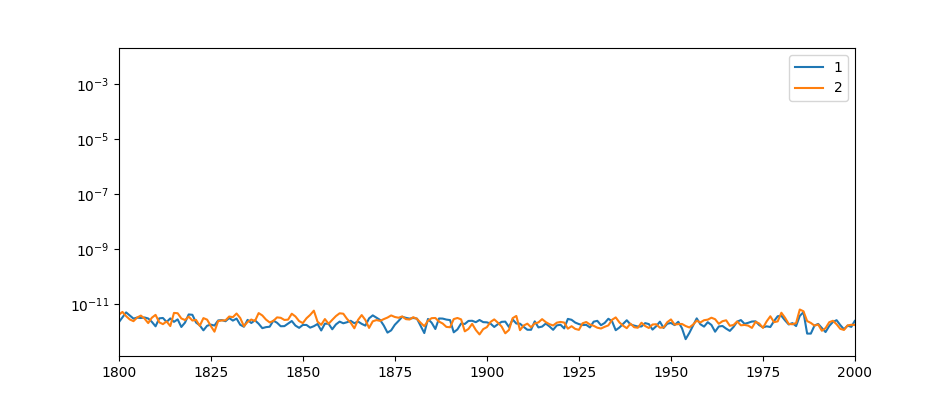

In [41]:
# rfft
xx_fft = [np.abs(np.fft.rfft(B.spin_data)) for B in bdfs]
xx_freq = np.fft.rfftfreq(50000, d=1/5000.)

# welch
res = 5000
ypsd = [matplotlib.mlab.psd(B.spin_data, Fs = 5000, NFFT = res)[0] for B in bdfs[-2:]]
freqs = matplotlib.mlab.psd(bdfs[0].spin_data, Fs = 5000, NFFT = res)[1]

_,ax = plt.subplots(figsize=(9.5,4))
[ax.semilogy(freqs, xx_fft_, label=i+1) for i,xx_fft_ in enumerate(ypsd)]
ax.set(xlim=(1800,2000))
ax.legend()

<IPython.core.display.Javascript object>


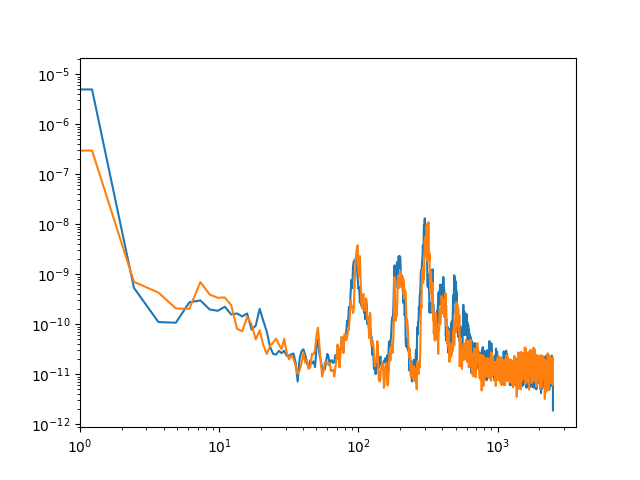

[(1, 3660.214239864062)]

In [38]:
_,ax = plt.subplots()
[ax.loglog(*B.welch_psd('x')) for B in bdfs[-2:]]
ax.set(xlim=(1,None))

### First success 

In [42]:
fnames = [r'/home/data_transfer/data_from_windows/20190917/Bead1/InitialTest/Data{}.h5'.format(i) for i in range(79,86)]
bdf_spin = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data


In [46]:
fsamp = 20000
res = 20000
spsd = [matplotlib.mlab.psd(B.spin_data, Fs = fsamp, NFFT = res)[0] for B in bdf_spin]
freq = matplotlib.mlab.psd(bdf_spin[0].spin_data, Fs = fsamp, NFFT = res)[1]

<IPython.core.display.Javascript object>


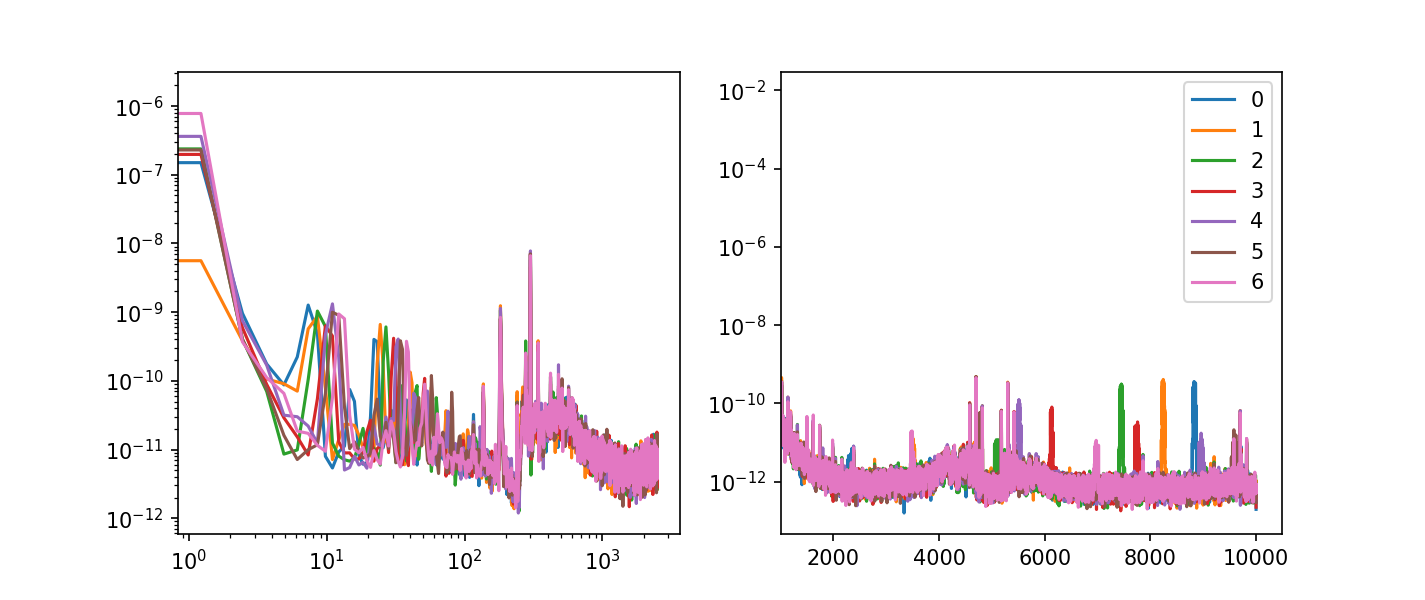

In [50]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
[ax[0].loglog(*B.welch_psd('x')) for B in bdf_spin]
[ax[1].semilogy(freq, psd_,label=i) for i,psd_ in enumerate(spsd)]
ax[1].set(xlim=(1000,None))
ax[1].legend()